## Libraries

In [1]:
import tensorflow as tf

import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

import os 
from PIL import Image

## Images 

Each image is a 28 by 28 grayscale image of a handwritten digit. There are 60000 images in the training set. 

In [2]:
# load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# scale data between 0 to 1
x_train = x_train / 255
x_test = x_test / 255

In [3]:
x_train.shape

(60000, 28, 28)

## View Data

Let's plot a few of the images to see what they look like.

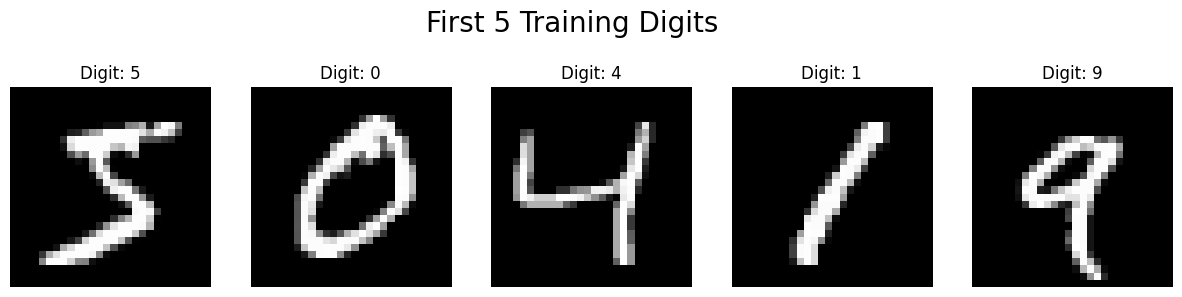

In [4]:
fig, axs = plt.subplots(figsize=(15, 5), ncols=5)
fig.suptitle('First 5 Training Digits', fontsize=20, y=0.85)
for i in range(5): 
    axs[i].set_axis_off()
    axs[i].imshow(x_train[i], cmap='gray')
    axs[i].set_title('Digit: ' + str(y_train[i]))
plt.show()

## Neural Network

My first model will be a simple sequential model with dense layers. 

In [5]:
# create model
simple_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'), 
    tf.keras.layers.Dense(units=10) 
])

In [6]:
# compile model
simple_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'),
    metrics=['accuracy']
)

In [7]:
# fit model
history = simple_model.fit(x_train, y_train, batch_size=15, epochs=15, validation_split=0.1, verbose=2)

Epoch 1/15
3600/3600 - 14s - 4ms/step - accuracy: 0.9312 - loss: 0.2285 - val_accuracy: 0.9693 - val_loss: 0.1057
Epoch 2/15
3600/3600 - 14s - 4ms/step - accuracy: 0.9671 - loss: 0.1067 - val_accuracy: 0.9768 - val_loss: 0.0788
Epoch 3/15
3600/3600 - 11s - 3ms/step - accuracy: 0.9764 - loss: 0.0771 - val_accuracy: 0.9725 - val_loss: 0.0938
Epoch 4/15
3600/3600 - 11s - 3ms/step - accuracy: 0.9806 - loss: 0.0629 - val_accuracy: 0.9773 - val_loss: 0.0809
Epoch 5/15
3600/3600 - 12s - 3ms/step - accuracy: 0.9851 - loss: 0.0485 - val_accuracy: 0.9778 - val_loss: 0.0824
Epoch 6/15
3600/3600 - 12s - 3ms/step - accuracy: 0.9870 - loss: 0.0431 - val_accuracy: 0.9767 - val_loss: 0.0830
Epoch 7/15
3600/3600 - 11s - 3ms/step - accuracy: 0.9881 - loss: 0.0379 - val_accuracy: 0.9820 - val_loss: 0.0782
Epoch 8/15
3600/3600 - 11s - 3ms/step - accuracy: 0.9899 - loss: 0.0331 - val_accuracy: 0.9785 - val_loss: 0.1020
Epoch 9/15
3600/3600 - 12s - 3ms/step - accuracy: 0.9906 - loss: 0.0301 - val_accuracy: 

## Model is overfitting 

The training accuracy is higher than validation accuracy after around 3 epochs.

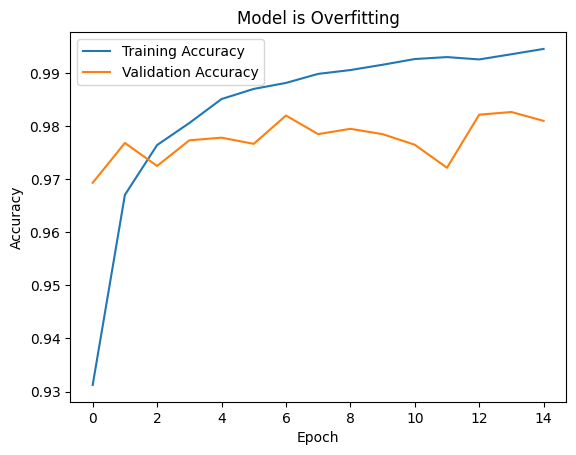

In [8]:
plt.title('Model is Overfitting')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Attempt 2

To help with overfitting, I am removing units from dense layers, removing a dense layers, adding dropout layers, and decreasing the learning rate. I also altered the batch size and number of epochs to see what worked well. 

In [9]:
simple_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=32, activation='relu'), 
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=10) 
])

simple_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'),
    metrics=['accuracy']
)

In [10]:
history = simple_model.fit(x_train, y_train, batch_size=10, epochs=20, validation_split=0.1, verbose=2)

Epoch 1/20
5400/5400 - 11s - 2ms/step - accuracy: 0.7824 - loss: 0.7395 - val_accuracy: 0.9332 - val_loss: 0.2578
Epoch 2/20
5400/5400 - 14s - 3ms/step - accuracy: 0.8990 - loss: 0.3467 - val_accuracy: 0.9502 - val_loss: 0.1844
Epoch 3/20
5400/5400 - 12s - 2ms/step - accuracy: 0.9192 - loss: 0.2759 - val_accuracy: 0.9563 - val_loss: 0.1531
Epoch 4/20
5400/5400 - 15s - 3ms/step - accuracy: 0.9320 - loss: 0.2323 - val_accuracy: 0.9620 - val_loss: 0.1357
Epoch 5/20
5400/5400 - 14s - 3ms/step - accuracy: 0.9395 - loss: 0.2047 - val_accuracy: 0.9638 - val_loss: 0.1249
Epoch 6/20
5400/5400 - 15s - 3ms/step - accuracy: 0.9455 - loss: 0.1840 - val_accuracy: 0.9675 - val_loss: 0.1132
Epoch 7/20
5400/5400 - 15s - 3ms/step - accuracy: 0.9500 - loss: 0.1683 - val_accuracy: 0.9688 - val_loss: 0.1100
Epoch 8/20
5400/5400 - 14s - 3ms/step - accuracy: 0.9531 - loss: 0.1561 - val_accuracy: 0.9713 - val_loss: 0.1003
Epoch 9/20
5400/5400 - 15s - 3ms/step - accuracy: 0.9568 - loss: 0.1420 - val_accuracy: 

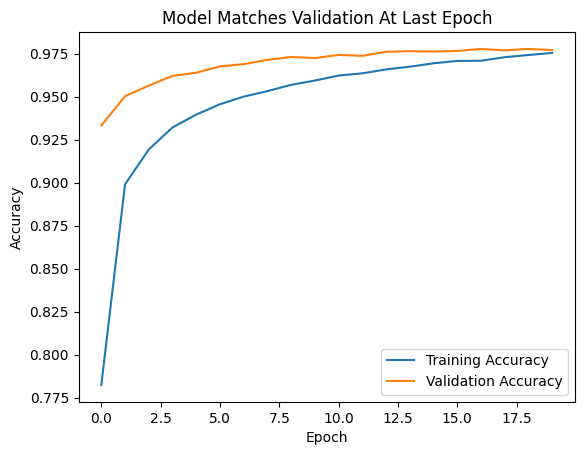

In [11]:
plt.title('Model Matches Validation At Last Epoch')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Testing the Model

Fitting on all data and evaluating with test data.

In [12]:
simple_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=32, activation='relu'), 
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=10) 
])
simple_model.summary()

simple_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'),
    metrics=['accuracy']
)



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
simple_model.fit(x_train, y_train, batch_size=10, epochs=23, verbose=2)

Epoch 1/23
6000/6000 - 14s - 2ms/step - accuracy: 0.8000 - loss: 0.6883
Epoch 2/23
6000/6000 - 14s - 2ms/step - accuracy: 0.9022 - loss: 0.3366
Epoch 3/23
6000/6000 - 14s - 2ms/step - accuracy: 0.9230 - loss: 0.2647
Epoch 4/23
6000/6000 - 14s - 2ms/step - accuracy: 0.9364 - loss: 0.2205
Epoch 5/23
6000/6000 - 20s - 3ms/step - accuracy: 0.9428 - loss: 0.1941
Epoch 6/23
6000/6000 - 15s - 2ms/step - accuracy: 0.9479 - loss: 0.1773
Epoch 7/23
6000/6000 - 15s - 2ms/step - accuracy: 0.9520 - loss: 0.1621
Epoch 8/23
6000/6000 - 14s - 2ms/step - accuracy: 0.9554 - loss: 0.1489
Epoch 9/23
6000/6000 - 13s - 2ms/step - accuracy: 0.9577 - loss: 0.1397
Epoch 10/23
6000/6000 - 14s - 2ms/step - accuracy: 0.9606 - loss: 0.1312
Epoch 11/23
6000/6000 - 14s - 2ms/step - accuracy: 0.9634 - loss: 0.1219
Epoch 12/23
6000/6000 - 14s - 2ms/step - accuracy: 0.9643 - loss: 0.1169
Epoch 13/23
6000/6000 - 15s - 3ms/step - accuracy: 0.9671 - loss: 0.1096
Epoch 14/23
6000/6000 - 15s - 3ms/step - accuracy: 0.9686 - 

Final accuracy around 97.5%

In [15]:
predictions = tf.nn.softmax(simple_model.predict(x_test)).numpy().argmax(axis=-1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


In [16]:
print('Accuracy:', accuracy_score(y_true=y_test, y_pred=predictions))
cm = confusion_matrix(y_true=y_test, y_pred=predictions)


Accuracy: 0.9756


We can also see from the confusion matrix that the model is mistaking 9s for 4s and 5s for 3s.

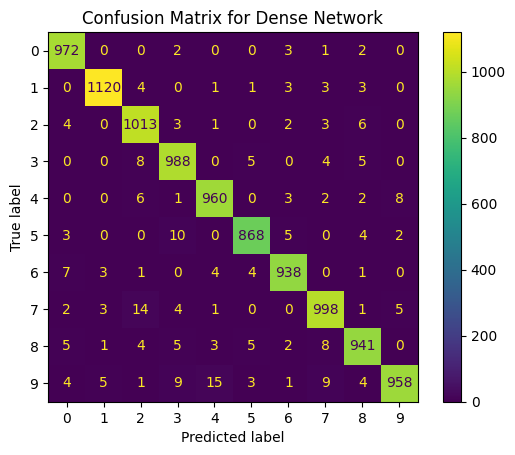

In [17]:
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix for Dense Network')
plt.show()

## Convolutional Neural Network

We are going to create a new model with convolution layers to pick up on patterns in the images better. For a convolution layer, we need to add a dimension for channels. In this case there is only one channel since the images are grayscale. 

In [18]:
x_train_expanded = np.expand_dims(x_train, axis=-1)
x_test_expanded = np.expand_dims(x_test, axis=-1)



In [19]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=7, kernel_size=(5, 5), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=5, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=10)
])

In [20]:
conv_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'),
    metrics=['accuracy']
)

In [21]:
history = conv_model.fit(x_train_expanded, y_train, batch_size=10, epochs=22, validation_split=0.1, verbose=2)

Epoch 1/22
5400/5400 - 26s - 5ms/step - accuracy: 0.8482 - loss: 0.5117 - val_accuracy: 0.9667 - val_loss: 0.1170
Epoch 2/22
5400/5400 - 30s - 6ms/step - accuracy: 0.9447 - loss: 0.1859 - val_accuracy: 0.9763 - val_loss: 0.0758
Epoch 3/22
5400/5400 - 28s - 5ms/step - accuracy: 0.9603 - loss: 0.1342 - val_accuracy: 0.9807 - val_loss: 0.0630
Epoch 4/22
5400/5400 - 21s - 4ms/step - accuracy: 0.9661 - loss: 0.1122 - val_accuracy: 0.9818 - val_loss: 0.0567
Epoch 5/22
5400/5400 - 22s - 4ms/step - accuracy: 0.9728 - loss: 0.0923 - val_accuracy: 0.9850 - val_loss: 0.0507
Epoch 6/22
5400/5400 - 23s - 4ms/step - accuracy: 0.9756 - loss: 0.0831 - val_accuracy: 0.9865 - val_loss: 0.0455
Epoch 7/22
5400/5400 - 17s - 3ms/step - accuracy: 0.9771 - loss: 0.0745 - val_accuracy: 0.9845 - val_loss: 0.0502
Epoch 8/22
5400/5400 - 20s - 4ms/step - accuracy: 0.9789 - loss: 0.0698 - val_accuracy: 0.9843 - val_loss: 0.0517
Epoch 9/22
5400/5400 - 24s - 4ms/step - accuracy: 0.9804 - loss: 0.0638 - val_accuracy: 

This model appears to not be overfitting.

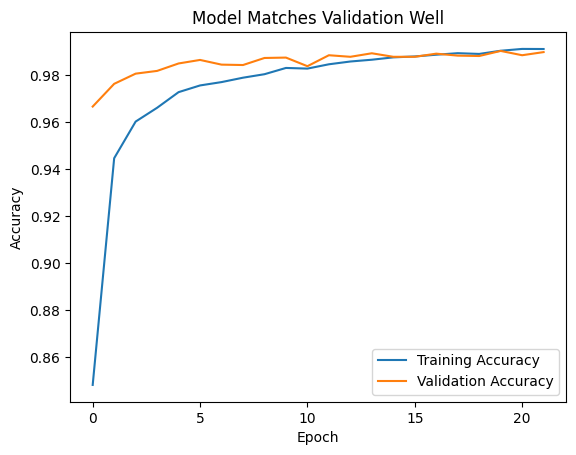

In [22]:
plt.title('Model Matches Validation Well')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Testing

I will train on all the data and evaluate the accuracy from the test data.

In [37]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=7, kernel_size=(5, 5), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=5, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=10)
])
conv_model.summary()

conv_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'),
    metrics=['accuracy']
)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 7)           │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 7)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 5)           │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 5)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 245)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          31,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,152 (160.75 KB)

 Trainable params: 41,024 (160.25 KB)

 Non-trainable params: 128 (512.00 B)

In [38]:
conv_model.fit(x_train_expanded, y_train, batch_size=10, epochs=20, verbose=2)

Epoch 1/20
6000/6000 - 28s - 5ms/step - accuracy: 0.8509 - loss: 0.5068
Epoch 2/20
6000/6000 - 25s - 4ms/step - accuracy: 0.9464 - loss: 0.1772
Epoch 3/20
6000/6000 - 24s - 4ms/step - accuracy: 0.9608 - loss: 0.1306
Epoch 4/20
6000/6000 - 25s - 4ms/step - accuracy: 0.9682 - loss: 0.1071
Epoch 5/20
6000/6000 - 24s - 4ms/step - accuracy: 0.9737 - loss: 0.0888
Epoch 6/20
6000/6000 - 25s - 4ms/step - accuracy: 0.9767 - loss: 0.0788
Epoch 7/20
6000/6000 - 25s - 4ms/step - accuracy: 0.9783 - loss: 0.0735
Epoch 8/20
6000/6000 - 25s - 4ms/step - accuracy: 0.9794 - loss: 0.0673
Epoch 9/20
6000/6000 - 23s - 4ms/step - accuracy: 0.9815 - loss: 0.0617
Epoch 10/20
6000/6000 - 28s - 5ms/step - accuracy: 0.9833 - loss: 0.0571
Epoch 11/20
6000/6000 - 28s - 5ms/step - accuracy: 0.9848 - loss: 0.0516
Epoch 12/20
6000/6000 - 27s - 4ms/step - accuracy: 0.9853 - loss: 0.0486
Epoch 13/20
6000/6000 - 23s - 4ms/step - accuracy: 0.9858 - loss: 0.0483
Epoch 14/20
6000/6000 - 24s - 4ms/step - accuracy: 0.9872 - 

This model is able to achieve near 99% percent accuracy

In [39]:
predictions = tf.nn.softmax(conv_model.predict(x_test_expanded)).numpy().argmax(axis=-1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [40]:
print('Accuracy:', accuracy_score(y_true=y_test, y_pred=predictions))
cm = confusion_matrix(y_true=y_test, y_pred=predictions)


Accuracy: 0.9896


From the confusion matrix we can see the model is mixing up a few digits but does well overall.

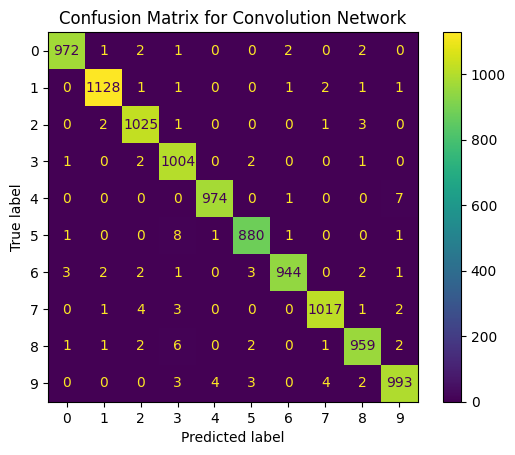

In [41]:
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix for Convolution Network')
plt.show()

## What Estimates Are Not Correct

Looking at 5 of the digits the model got wrong, it is clear these digits are not very legible. Even as a human, it is difficult to guess what some of these digits are suposed to be. 

In [42]:
is_correct = predictions == y_test
first_5_wrong = x_test[~is_correct][:5]

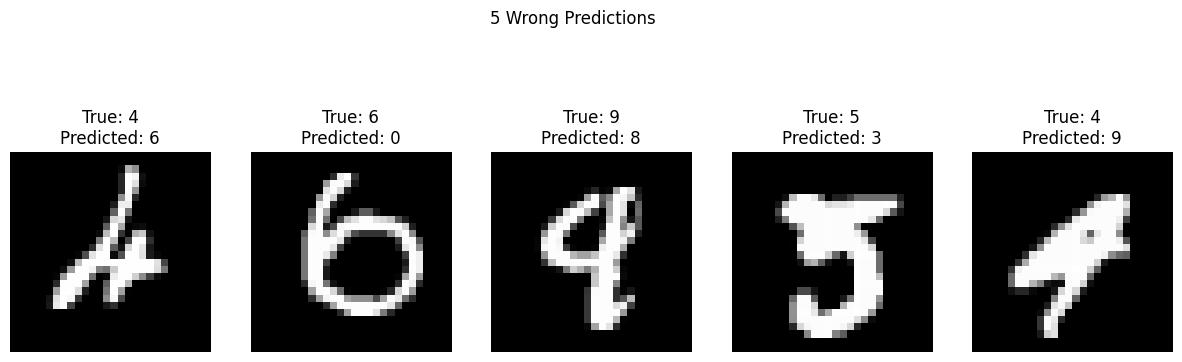

In [43]:
fig, axs = plt.subplots(figsize=(15, 5), ncols=5)
plt.suptitle('5 Wrong Predictions')

for i in range(5):
    axs[i].set_axis_off()
    axs[i].imshow(first_5_wrong[i], cmap='gray')
    axs[i].set_title('True: ' + str(y_test[~is_correct][i]) + '\nPredicted: ' + str(predictions[~is_correct][i]))
    
plt.show()

## Just for Fun

I am using the model to predict some handwritten digits I wrote. 

In [44]:
# load images as numpy arrays
images = []
for file in os.listdir('my_digits'):
    img = Image.open('my_digits/' + file).convert('L')
    img = np.asarray(img) / 255
    images.append(img) 

In [45]:
# Add channel dimension

images = np.array(images)
images_expanded = np.expand_dims(images, -1)

In [46]:
# 10, 28 by 28 images with 1 channel
images_expanded.shape

(10, 28, 28, 1)

In [47]:
predictions = conv_model.predict(images_expanded)
probabilities = tf.nn.softmax(predictions).numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [48]:
# see predictions 

num_predicted = probabilities.argmax(axis=-1)
print('Predicted:', num_predicted)

Predicted: [8 5 4 9 1 7 6 3 2 0]


## Plotting Predictions

As we can see, the model predicted each of my digits correctly which is reassuring. 

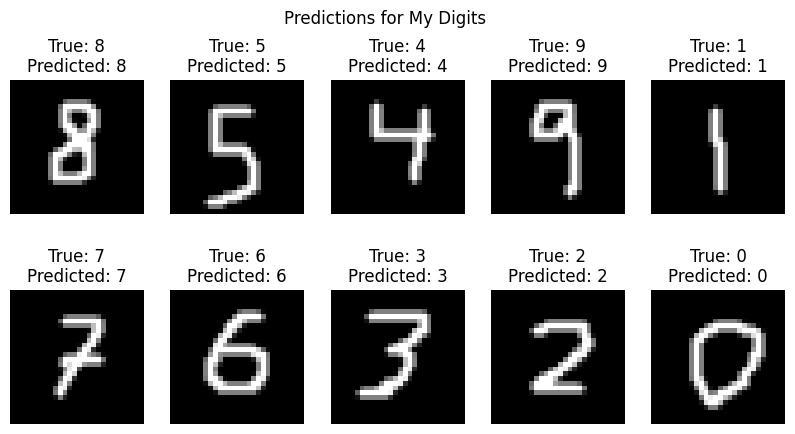

In [49]:
true_nums = [8, 5, 4, 9, 1, 7, 6, 3, 2, 0]

fig, axs = plt.subplots(figsize=(10, 5), nrows=2, ncols=5)
plt.suptitle('Predictions for My Digits')
for i in range(len(images)):
    row = i // 5
    col = i % 5
    curr_axis = axs[row][col]

    curr_axis.set_axis_off()
    curr_axis.imshow(images[i], cmap='gray')
    curr_axis.set_title('True: ' + str(true_nums[i]) + '\nPredicted: ' + str(num_predicted[i]))
    

plt.show()